# Homework 6 - Behrad Moniri (95109564)

In this homework we will investigate the effect of changing the number of hidden layers, number of neurons in a layer and number of steps in SGD algorithm on the overall results of a fully connected perceptron in a multiclass (12 class) classification task.


The first step is loading the data:

In [1]:
from sklearn.neural_network import MLPClassifier
import numpy as np
import warnings
warnings.filterwarnings('ignore')

X = np.genfromtxt('X_train.txt', delimiter=' ')
Y = np.genfromtxt('y_train.txt', delimiter=' ')

After loading the data, we should hold out 10% of our data, chosen randomly, for validation. For this, we will use the test_split function in sklearn:

In [27]:
import sklearn
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.1, random_state = 0)

print(xTrain.shape)
print(xTest.shape)

(6990, 561)
(777, 561)


## Part a

We set the number of epochs to {10, 100, 200, 300, 400} and compare the accuracies. (8 hidden layers each with 8 neurons)


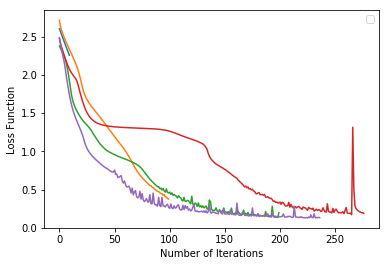

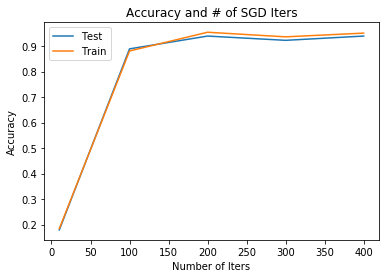

In [18]:
import matplotlib.pyplot as plt
A = [10, 100, 200, 300, 400]
Test_Acc = [0,0,0,0,0]
Train_Acc = [0,0,0,0,0]
plt.figure()
plt.legend(['10 steps', '100 steps', '200 steps', '300 steps', '400 steps'])
plt.ylabel('Loss Function')
plt.xlabel('Number of Iterations')
for step in range(5):
    clf = MLPClassifier(solver='sgd', max_iter = A[step], hidden_layer_sizes=(8, 8, 8, 8, 8, 8, 8, 8), activation='relu')
    clf.fit(xTrain, yTrain)   
    Test_Acc[step] = sklearn.metrics.accuracy_score(yTest, clf.predict(xTest))
    Train_Acc[step] = sklearn.metrics.accuracy_score(yTrain,clf.predict(xTrain))
    plt.plot(clf.loss_curve_)
plt.show()


plt.figure()
plt.plot(A, Test_Acc)
plt.plot(A, Train_Acc)
plt.xlabel('Number of Iters')
plt.ylabel('Accuracy')
plt.legend(['Test','Train'])
plt.title('Accuracy and # of SGD Iters')
plt.show()


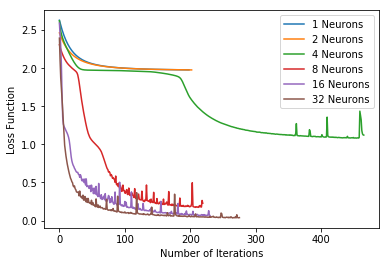

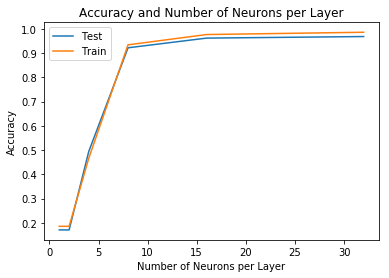

In [52]:
import matplotlib.pyplot as plt
A = [1,2,4,8,16,32]
Test_Acc = [0,0,0,0,0,0]
Train_Acc = [0,0,0,0,0,0]
plt.figure()
plt.ylabel('Loss Function')
plt.xlabel('Number of Iterations')
for i in range(6):
    clf = MLPClassifier(solver='sgd',max_iter=1000, hidden_layer_sizes=(A[i],A[i],A[i],A[i],A[i],A[i],A[i],A[i])
                , activation='relu')
    
    clf.fit(xTrain, yTrain)   
    Test_Acc[i] = sklearn.metrics.accuracy_score(yTest, clf.predict(xTest))
    Train_Acc[i] = sklearn.metrics.accuracy_score(yTrain,clf.predict(xTrain))
    plt.plot(clf.loss_curve_)

plt.legend(['1 Neurons', '2 Neurons', '4 Neurons', '8 Neurons', '16 Neurons', '32 Neurons'])
plt.show()

plt.figure()
plt.plot(A, Test_Acc)
plt.plot(A, Train_Acc)
plt.xlabel('Number of Neurons per Layer')
plt.ylabel('Accuracy')
plt.legend(['Test','Train'])
plt.title('Accuracy and Number of Neurons per Layer')
plt.show()

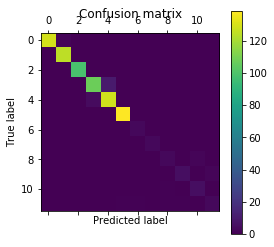

In [44]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(yTest, clf.predict(xTest))
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

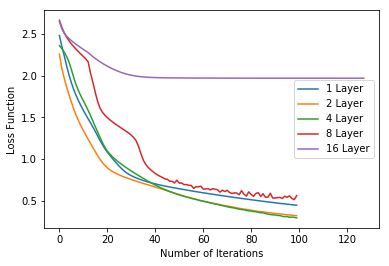

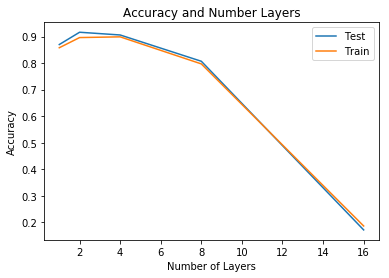

In [51]:
Test_Acc1 = [0,0,0,0,0]
Train_Acc1 = [0,0,0,0,0]

plt.figure()
plt.ylabel('Loss Function')
plt.xlabel('Number of Iterations')

clf = MLPClassifier(solver='sgd',max_iter=100, hidden_layer_sizes=(8)
                , activation='relu')
clf.fit(xTrain, yTrain)   
Test_Acc1[0] = sklearn.metrics.accuracy_score(yTest, clf.predict(xTest))
Train_Acc1[0] = sklearn.metrics.accuracy_score(yTrain,clf.predict(xTrain))
plt.plot(clf.loss_curve_)
######################################
clf = MLPClassifier(solver='sgd',max_iter=100, hidden_layer_sizes=(8, 8)
                , activation='relu')
clf.fit(xTrain, yTrain)   
Test_Acc1[1] = sklearn.metrics.accuracy_score(yTest, clf.predict(xTest))
Train_Acc1[1] = sklearn.metrics.accuracy_score(yTrain,clf.predict(xTrain))
plt.plot(clf.loss_curve_)

######################################
clf = MLPClassifier(solver='sgd',max_iter=100, hidden_layer_sizes=(8, 8, 8, 8)
                , activation='relu')
clf.fit(xTrain, yTrain)   
Test_Acc1[2] = sklearn.metrics.accuracy_score(yTest, clf.predict(xTest))
Train_Acc1[2] = sklearn.metrics.accuracy_score(yTrain,clf.predict(xTrain))
plt.plot(clf.loss_curve_)

######################################
clf = MLPClassifier(solver='sgd',max_iter=100, hidden_layer_sizes=(8, 8, 8, 8, 8, 8, 8, 8)
                , activation='relu')
clf.fit(xTrain, yTrain)   
Test_Acc1[3] = sklearn.metrics.accuracy_score(yTest, clf.predict(xTest))
Train_Acc1[3] = sklearn.metrics.accuracy_score(yTrain,clf.predict(xTrain))
plt.plot(clf.loss_curve_)

######################################
clf = MLPClassifier(solver='sgd',max_iter=10000, hidden_layer_sizes=(8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8)
                , activation='relu', tol = 1e-100)
clf.fit(xTrain, yTrain)   
Test_Acc1[4] = sklearn.metrics.accuracy_score(yTest, clf.predict(xTest))
Train_Acc1[4] = sklearn.metrics.accuracy_score(yTrain,clf.predict(xTrain))
plt.plot(clf.loss_curve_)

plt.legend(['1 Layer', '2 Layer', '4 Layer', '8 Layer', '16 Layer'])
plt.show()

plt.figure()
plt.plot([1,2,4,8,16], Test_Acc1)
plt.plot([1,2,4,8,16], Train_Acc1)
plt.xlabel('Number of Layers')
plt.ylabel('Accuracy')
plt.legend(['Test','Train'])
plt.title('Accuracy and Number Layers')
plt.show()